In [15]:
import matplotlib.pyplot as plt 
import numpy as np

def LIF_noise(t_range, dt, Vth, Vreset, tau_m, sigmaV):

    # init voltage
    V = np.zeros(len(t_range))
    V[0] = - 70 # mV
   
    spikes = []
    for i in range(1,len(t_range)):

        # compute E eff
        Eeff = -56.0 + (sigmaV * np.sqrt((2*tau_m)/dt)* np.random.randn())
        # compute voltage
        dV = (-V[i-1]+Eeff)/tau_m
        V[i] = V[i-1] + dV*dt

        # check if it spiked
        if V[i] >= Vth:
            V[i] = Vreset
            spikes.append(t_range[i])
    
    return V, spikes

Text(0, 0.5, 'Voltage  (mV)')

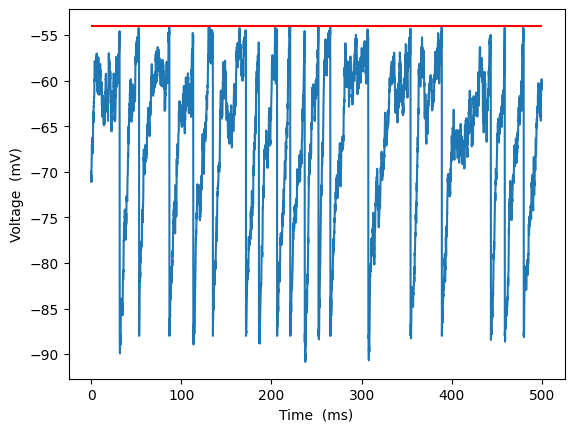

In [16]:
# test model
Vth = -54 # mV
Vreset = -88 #mV
tau_m = 10 # ms

# simulation times
dt = 0.1 #ms
T = 500
t_range = np.arange(0, T, dt)
sigmaV = 5

V, spikes = LIF_noise(t_range, dt, Vth, Vreset, tau_m, sigmaV)

plt.figure()
plt.plot(t_range,V)
plt.hlines(Vth,0,500, 'r')
plt.xlabel('Time  (ms)')  
plt.ylabel('Voltage  (mV)')  

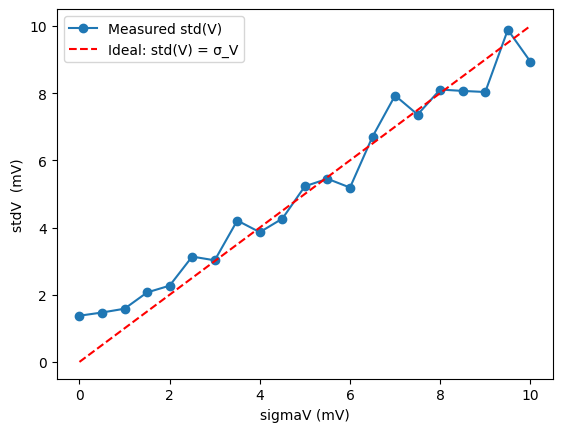

In [17]:
# solve point a:
Vth_high = 1e6 # mV
sigmaV = np.linspace(0, 10, num=21)


std_V = np.zeros(len(sigmaV))
for i in range(len(sigmaV)):
    sig = sigmaV[i]
    V, spikes = LIF_noise(t_range, dt, Vth_high, Vreset, tau_m, sig)
    std_V[i] = np.std(V)

plt.figure()
plt.plot(sigmaV,std_V, 'o-', label='Measured std(V)')
plt.plot(sigmaV, sigmaV, 'r--', label='Ideal: std(V) = σ_V')
plt.xlabel('sigmaV (mV)')  
plt.ylabel('stdV  (mV)')
plt.legend()  
    

0.5


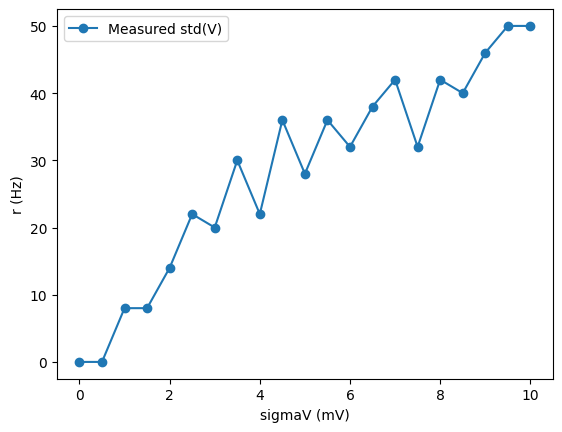

In [22]:
# solve point b
T_sec = T/1000
print(T_sec)
std_V = np.zeros(len(sigmaV))
fr = np.zeros(len(sigmaV))
for i in range(len(sigmaV)):
    sig = sigmaV[i]
    V, spikes = LIF_noise(t_range, dt, Vth, Vreset, tau_m, sig)
    fr[i] = len(spikes)/T_sec


plt.figure()
plt.plot(sigmaV,fr, 'o-', label='Measured std(V)')
plt.ylabel('r (Hz)')  
plt.xlabel('sigmaV (mV)')
plt.legend() 

